# <h><b><i><font color="red">This is the First part of my journey to become a data scientist to achieve that let's start exploring data set of  good reads books dataset and this is obtained from kaggle link
<a>https://www.kaggle.com/jealousleopard/goodreadsbooks/downloads/goodreadsbooks.zip/6</a></h>

# Exploratory Data Analysis

* Exploratory Data Analysis 
is a task of analysing data using basics of mathematics and statistics
* Univariate Analysis ---->histograms,pdf,cdf
* bi variate analysis ---->Scatter plots and pair plots
No of pair plots formed if we have n features is 
* nC2
Height of histogram gives how often we will find the value on x-axis ,More frequent we estimate more chance it belongs to that class
PDF is smoothed version of histogram
d(cdf)/dx = pdf
* Mean 
is prone to outliers.
* Median --->
central value & not prone to outliers.
* Median gets corrupted if more than 50% of our data is corrupted.
Now a days,percentiles are more used than std-dev
* IQR = (75-25)%les
* IQR ---> proxy for std & no affect of outliers.
* BOXPLOTS--->Whiskers
* seaborn(1.5*IQR)
* General-->min,max
* VIOLINPLOTS--->BOXPLOTS+histogram

In [9]:
data = pd.read_csv("/content/drive/My Drive/Data_Scientist/EDA/books.csv",error_bad_lines=False)
data.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [11]:
print(data.shape)

(13714, 10)


***It is a dataset containing 13714 records with 10 features***

In [26]:
data.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


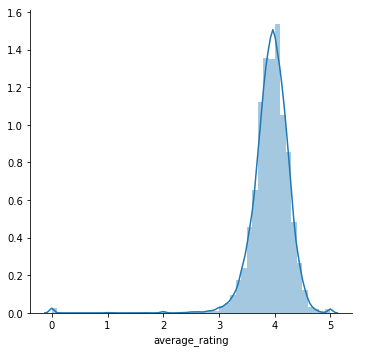

In [16]:
sns.FacetGrid(data,size=5)\
.map(sns.distplot,"average_rating")\
.add_legend();
plt.show();

***The most of the average rating presents between 3 - 5***

In [20]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

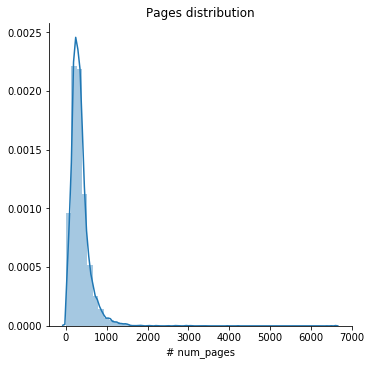

In [24]:
sns.FacetGrid(data,size=5)\
.map(sns.distplot,"# num_pages")\
.add_legend();
plt.title("Pages distribution");
plt.show();

[9.21175441e-01 7.18973312e-02 5.10427301e-03 6.56263672e-04
 7.29181858e-04 1.45836372e-04 1.45836372e-04 7.29181858e-05
 0.00000000e+00 7.29181858e-05]
[   0.   657.6 1315.2 1972.8 2630.4 3288.  3945.6 4603.2 5260.8 5918.4
 6576. ]


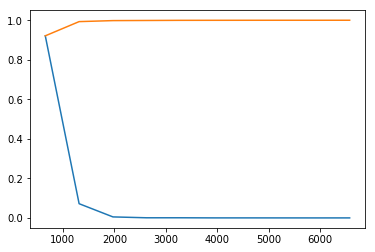

In [87]:
counts,bin_edges =  np.histogram(data['# num_pages'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show();

In [91]:
num_pages_list = list(data['# num_pages'])
num_pages_list.sort()
print("99 th percentile value is",np.percentile(data['# num_pages'],99))

99 th percentile value is 1200.0


***1% of the books are more than 1200 pages***

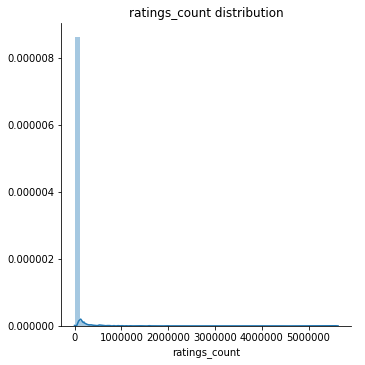

In [31]:
sns.FacetGrid(data,size=5)\
.map(sns.distplot,"ratings_count")\
.add_legend();
plt.title("ratings_count distribution");
plt.show();

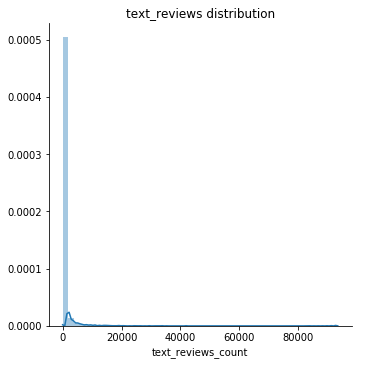

In [29]:
sns.FacetGrid(data,size=5)\
.map(sns.distplot,"text_reviews_count")\
.add_legend();
plt.title("text_reviews distribution");
plt.show();

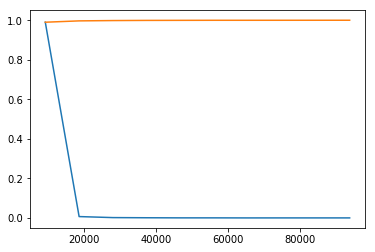

In [92]:
counts,bin_edges =  np.histogram(data['text_reviews_count'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show();

In [97]:
num_pages_list = list(data['text_reviews_count'])
num_pages_list.sort()
print("99.5 th percentile value is",np.percentile(data['text_reviews_count'],99.5))

99.5 th percentile value is 14443.609999999997


***0.5 percentile of the text_reviews_count is greater than 15000***

In [42]:
lang_list = data['language_code'].value_counts()
lang_list_index = list(lang_list.index)
lang_lis_values = []
for i in lang_list :
  lang_lis_values.append(i)
print(lang_list_index)
print(lang_lis_values)

['eng', 'en-US', 'spa', 'en-GB', 'ger', 'fre', 'jpn', 'por', 'mul', 'ita', 'zho', 'grc', 'en-CA', 'nl', 'rus', 'swe', 'glg', 'cat', 'lat', 'tur', 'enm', 'ara', 'msa', 'ale', 'dan', 'srp', 'wel', 'heb', 'gla', 'nor']
[10594, 1699, 419, 341, 238, 209, 64, 27, 21, 19, 16, 12, 9, 7, 7, 6, 4, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]


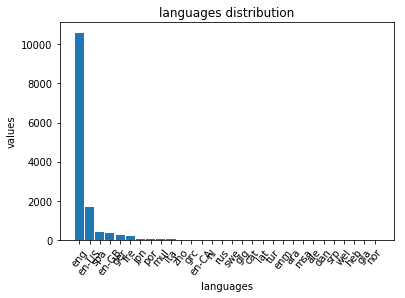

In [65]:
plt.bar(lang_list_index,lang_lis_values,width=0.9)
plt.xlabel('values', fontsize=10)
plt.ylabel('languages', fontsize=10)
plt.xticks(lang_list_index, fontsize=10, rotation=50)
plt.title("languages distribution");
plt.show();

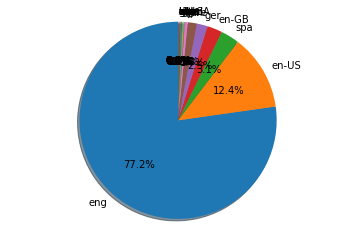

In [86]:
# pie plot : https://pythonspot.com/matplotlib-pie-chart/

import matplotlib.pyplot as plt

# Plot
plt.pie(lang_lis_values, labels=lang_list_index,
autopct='%0.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

***77.2% of the books are english language based***

In [0]:
authors_list = data['authors'].value_counts()
authors_list = authors_list[:10]
authors_list_index = list(authors_list.index)
authors_lis_values = []
for i in authors_list :
  authors_lis_values.append(i)

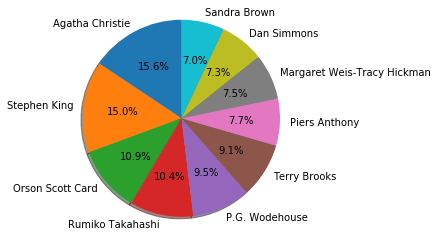

In [107]:
# pie plot : https://pythonspot.com/matplotlib-pie-chart/

import matplotlib.pyplot as plt

# Plot
plt.pie(authors_lis_values, labels=authors_list_index,
autopct='%0.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

***The above picture gives us the top 10 authors of the given data set***

In [115]:
!pip install tqdm

In [0]:
from tqdm import tqdm

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [122]:
preprocessed_text_values = []

for sentence in tqdm(data['title'].values) :
  term = decontracted(sentence)
  term = term.replace(")","")
  term = term.replace("(","")
  term = term.replace("&","_")
  term = term.replace("#","")
  preprocessed_text_values.append(term.lower().strip())

100%|██████████| 13714/13714 [00:00<00:00, 73761.77it/s]


In [0]:
from collections import Counter
my_counter = Counter()
for word in preprocessed_text_values:
    my_counter.update(word.split())

In [0]:
sorted_my_counter = sorted(my_counter.items(), key=lambda kv: kv[1],reverse=True)

In [0]:
for i in sorted_my_counter[0:10] :
  words.append(i[0])
  word_count.append(i[1])

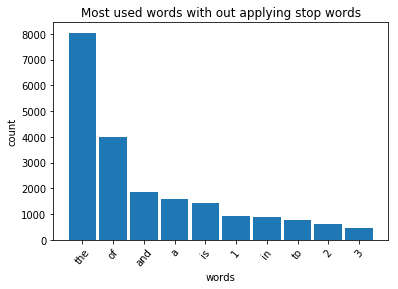

In [149]:
plt.bar(words[0:10],word_count[0:10],width=0.9)
plt.xlabel('words', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.xticks(words[0:10], fontsize=10, rotation=50)
plt.title("Most used words with out applying stop words");
plt.show();

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
required_counter_list = []
for i in sorted_my_counter  :
  if i[0] not in stopwords :
    required_counter_list.append(i)

In [0]:
words = []
word_count = []
for i in required_counter_list[0:10] :
  words.append(i[0])
  word_count.append(i[1])

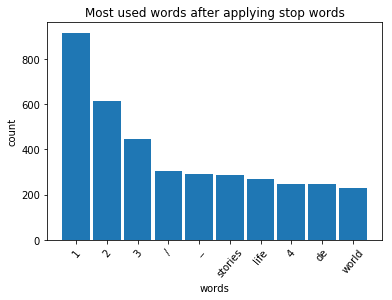

In [162]:
plt.bar(words[0:10],word_count[0:10],width=0.9)
plt.xlabel('words', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.xticks(words[0:10], fontsize=10, rotation=50)
plt.title("Most used words after applying stop words");
plt.show();

<h><font color='red'>Continue:</font></h> ***This is the EDA part and we need to do data preprocessing and data cleaning and machine learning models a lot more to go so let's keep learning***